In [2]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

warnings.filterwarnings("ignore")

#dados = pd.read_csv(url, on_bad_lines="skip", sep=";") #lida com linhas com algum espaço vazio
dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

# 🟤 **Regressão - Impacto do PIB Municipal e das Transferências nas Finanças dos Municípios**


Após a realização da análise estatística descritiva dos dados e, posteriormente, da análise e interpretação gráfica dos resultados obtidos, foi dado prosseguimento à investigação da seguinte pergunta: **Existe relação entre maior PIB municipal, maior receita própria e menor dependência de transferências correntes e de capital, e o índice de autonomia financeira nos municípios?** Neste documento, aplicou-se a técnica de regressão linear com o objetivo de compreender melhor como as variáveis econômicas influenciam os municípios, buscando explicar certas variações e fundamentar conclusões a partir dos dados disponíveis.



In [3]:
import pandas as pd
import numpy as np
from IPython.display import HTML

dados['Receita_Propria'] = dados['Receitas_R$'] - (
    dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']
)

dados['Dependencia_Transferencias'] = np.where(
    (dados['Receitas_R$'] != 0) &
    (dados['Transferencias_correntes_R$'] != 0) &
    (dados['Transferencias_capital_R$'] != 0),
    (dados['Transferencias_correntes_R$'] + dados['Transferencias_capital_R$']) / dados['Receitas_R$'] * 100,
    np.nan
)

dados['Indice_Autonomia'] = np.where(
    (dados['Receitas_R$'] != 0) &
    (dados['Receita_Propria'] != 0),
    (dados['Receita_Propria'] / dados['Receitas_R$']) * 100,
    np.nan
)

colunas_analise = [
    'PIB',
    'Receitas_R$',
    'Receita_Propria',
    'Transferencias_correntes_R$',
    'Transferencias_capital_R$',
    'Dependencia_Transferencias',
    'Indice_Autonomia'
]

dados_filtrados = dados[colunas_analise].replace(0, np.nan).dropna()

dados_filtrados = dados_filtrados[
    (dados_filtrados['Dependencia_Transferencias'] >= 0) &
    (dados_filtrados['Dependencia_Transferencias'] <= 100) &
    (dados_filtrados['Indice_Autonomia'] >= 0) &
    (dados_filtrados['Indice_Autonomia'] <= 100)
]

estatisticas = dados_filtrados.describe().round(2)



## 🔷 Regressão Linear Simples

Inicialmente, para essa análise, foram utilizados dados previamente filtrados e tratados na etapa anterior, desconsiderando-se colunas com valores iguais a zero ou percentuais fora do intervalo entre 0% e 100%, por serem representativos de outliers, inconsistências nos dados ou possíveis ruídos. Além disso, valores ausentes foram excluídos, considerando as exigências do modelo de regressão utilizado.

Para a aplicação da Regressão Linear, foi utilizado o modelo **LinearRegression** com o intuito de investigar a possível existência de uma relação linear entre o PIB e, separadamente, o Índice de Autonomia, a Dependência Financeira e a Receita Própria. Nesse modelo, a variável dependente (Y) escolhida em todas as análises foi o PIB, enquanto as variáveis independentes (X) foram, respectivamente, o Índice de Autonomia, a Dependência Financeira e a Receita Própria, com o objetivo de entender como essas características influenciam o PIB. Em algumas análises, foi necessário aplicar a transformação logarítmica em certas variáveis, especialmente o PIB, devido à sua escala e distribuição, a fim de atender melhor às premissas do modelo e melhorar a interpretação dos resultados. Foram calculados o coeficiente angular, o intercepto e o coeficiente de determinação (R²) para interpretar o grau e a direção da relação entre as variáveis. Para complementar a análise, também foi gerado um gráfico de dispersão com a linha de regressão ajustada, facilitando a visualização do padrão de relacionamento entre as variáveis analisadas.


Coeficiente: 0.0871
Intercepto: 10.6223
R²: 0.4191


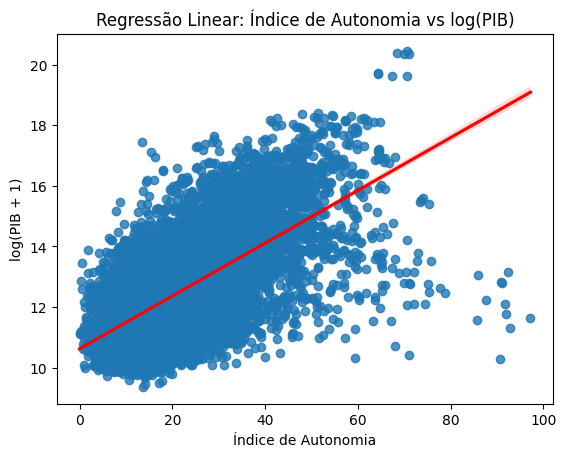

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt


dados_modelo = dados_filtrados[['PIB', 'Indice_Autonomia']].copy()
dados_modelo = dados_modelo[(dados_modelo['PIB'] > 0)].dropna()

dados_modelo['log_PIB'] = np.log1p(dados_modelo['PIB'])

X = dados_modelo[['Indice_Autonomia']]
y = dados_modelo['log_PIB']

modelo = LinearRegression()
modelo.fit(X, y)

coef = modelo.coef_[0]
intercept = modelo.intercept_
r2 = modelo.score(X, y)

print(f"Coeficiente: {coef:.4f}")
print(f"Intercepto: {intercept:.4f}")
print(f"R²: {r2:.4f}")

# Gráfico com Seaborn
sns.regplot(x='Indice_Autonomia', y='log_PIB', data=dados_modelo, line_kws={'color':'red'})
plt.title('Regressão Linear: Índice de Autonomia vs log(PIB)')
plt.xlabel('Índice de Autonomia')
plt.ylabel('log(PIB + 1)')
plt.show()


## 🔸 Interpretação dos Resultados - Índice de Autonomia x PIB

Com base nos resultados obtidos para a relação entre o PIB e o Índice de Autonomia, o coeficiente angular de 0,0871 indica que, a cada unidade de aumento no Índice de Autonomia, o log do PIB tende a aumentar, em média, 0,0871 unidades, mantendo as demais variáveis constantes. O intercepto de 10,6223 representa o valor estimado do log do PIB quando o Índice de Autonomia é zero. Já o coeficiente de determinação (R²) de 0,4191 revela que aproximadamente 41,91% da variação no log do PIB pode ser explicada pelo Índice de Autonomia, sugerindo uma relação moderada entre as variáveis. Esses resultados indicam que existe uma associação positiva e estatisticamente relevante entre maior autonomia financeira dos municípios e o aumento do PIB, embora outros fatores também influenciem significativamente essa variável econômica.


Coeficiente: -0.0871
Intercepto: 19.3366
R²: 0.4191


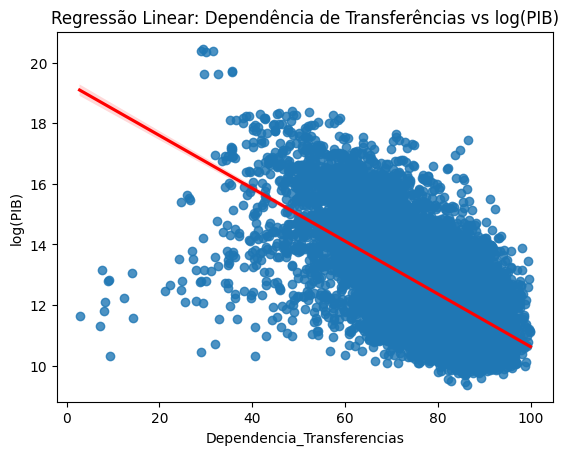

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dados_modelo_dep = dados_filtrados[['PIB', 'Dependencia_Transferencias']].dropna()

X_dep = dados_modelo_dep[['Dependencia_Transferencias']]

y_dep = np.log(dados_modelo_dep['PIB'])

modelo_dep = LinearRegression()
modelo_dep.fit(X_dep, y_dep)

coef_dep = modelo_dep.coef_[0]
intercept_dep = modelo_dep.intercept_
r2_dep = modelo_dep.score(X_dep, y_dep)

print(f"Coeficiente: {coef_dep:.4f}")
print(f"Intercepto: {intercept_dep:.4f}")
print(f"R²: {r2_dep:.4f}")

sns.regplot(x='Dependencia_Transferencias', y=np.log(dados_modelo_dep['PIB']), data=dados_modelo_dep, line_kws={'color':'red'})
plt.title('Regressão Linear: Dependência de Transferências vs log(PIB)')
plt.ylabel('log(PIB)')
plt.show()


## 🔸 Interpretação dos Resultados - Dependência Financeira x PIB

Com base nos resultados obtidos para a relação entre a Dependência Financeira e o PIB, o coeficiente angular de -0,0871 indica que, a cada unidade de aumento na Dependência Financeira, o log do PIB tende a diminuir, em média, 0,0871 unidades, mantendo as demais variáveis constantes. O intercepto de 19,3366 representa o valor estimado do log do PIB quando a Dependência Financeira é zero. O coeficiente de determinação (R²) de 0,4191 revela que cerca de 41,91% da variação no log do PIB pode ser explicada pela Dependência Financeira, sugerindo uma relação moderada. Esses resultados apontam para uma associação negativa entre a dependência de transferências e o PIB dos municípios, indicando que, quanto maior a dependência financeira, menor tende a ser o PIB, o que reforça a importância da autonomia financeira para o desenvolvimento econômico local.


Coeficiente: 0.9401
Intercepto: -2.6732
R²: 0.8253


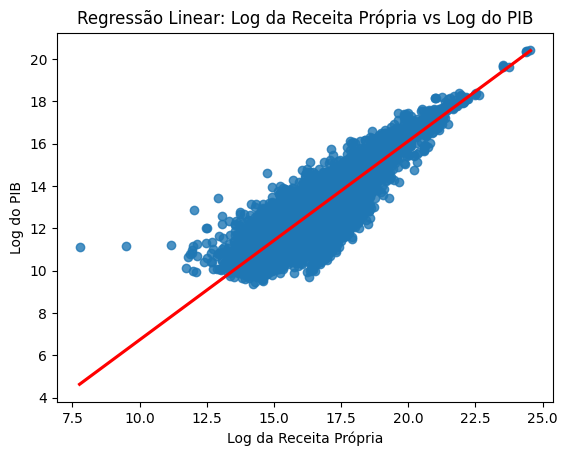

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dados_modelo = dados[['PIB', 'Receita_Propria']].copy()
dados_modelo = dados_modelo.replace(0, np.nan).dropna()

dados_modelo = dados_modelo[
    (dados_modelo['PIB'] > 0) &
    (dados_modelo['Receita_Propria'] > 0)
]

dados_modelo['log_PIB'] = np.log1p(dados_modelo['PIB'])
dados_modelo['log_Receita_Propria'] = np.log1p(dados_modelo['Receita_Propria'])

X = dados_modelo[['log_Receita_Propria']]
y = dados_modelo['log_PIB']

modelo = LinearRegression()
modelo.fit(X, y)

coef = modelo.coef_[0]
intercept = modelo.intercept_
r2 = modelo.score(X, y)

print(f"Coeficiente: {coef:.4f}")
print(f"Intercepto: {intercept:.4f}")
print(f"R²: {r2:.4f}")

sns.regplot(x='log_Receita_Propria', y='log_PIB', data=dados_modelo, line_kws={'color':'red'})
plt.xlabel('Log da Receita Própria')
plt.ylabel('Log do PIB')
plt.title('Regressão Linear: Log da Receita Própria vs Log do PIB')
plt.show()


## 🔸 Interpretação dos Resultados - Receita Própria x PIB

Os resultados da análise entre Receita Própria e PIB indicam uma forte relação positiva entre as variáveis. O coeficiente angular de 0,9401 mostra que, a cada unidade de aumento na Receita Própria, o log do PIB tende a aumentar, em média, 0,9401 unidades, mantendo as demais variáveis constantes. O coeficiente de determinação (R²) de 0,8253 revela que aproximadamente 82,53% da variação no log do PIB pode ser explicada pela Receita Própria, indicando uma forte capacidade explicativa do modelo. Esses resultados sugerem que municípios com maior arrecadação própria tendem a apresentar níveis mais elevados de PIB, evidenciando a relevância da capacidade de geração de receita local para o crescimento econômico municipal.


## 🔷 Conclusão

Os resultados indicam que o PIB dos municípios está positivamente relacionado à Receita Própria e ao Índice de Autonomia, e negativamente relacionado à Dependência Financeira. Enquanto a Receita Própria apresenta uma forte associação com o PIB (R² = 0,8253), evidenciando que maior capacidade de arrecadação local está fortemente ligada a níveis superiores de PIB, o Índice de Autonomia também contribui positivamente, ainda que com impacto moderado (R² = 0,4191). Por outro lado, a Dependência Financeira tem efeito negativo semelhante em magnitude ao Índice de Autonomia, indicando que maior dependência de transferências reduz o PIB municipal. Esses resultados reforçam a importância da autonomia financeira para o desenvolvimento econômico dos municípios, mas também indicam que outros fatores não analisados neste estudo influenciam o PIB, apontando para a complexidade dos determinantes do crescimento econômico local.

